In [3]:
from datasets import load_dataset
from PIL import Image
import numpy as np

ds = load_dataset("ylecun/mnist")

In [4]:
import matplotlib.pyplot as plt
from sklearn import svm,metrics
import pickle

In [5]:
def pil_to_0_1_array(image):
    image_gray = image.convert('L')
    image_resized = image_gray.resize((28, 28))
    image_array = np.array(image_resized)
    threshold = 128
    image_array_binary = (image_array > threshold).astype(np.uint8)
    return image_array_binary.flatten().tolist() 

In [6]:
# print(ds.shape)
# print(ds['train'][0])
# print(ds['train'][0]['image'])

trainData=[]
trainLabel=[]

trainLen=ds.shape['train'][0]


for i in range(trainLen):
    image=ds['train'][i]['image']
    image=pil_to_0_1_array(image)
    trainData.append(image)
    trainLabel.append(ds['train'][i]['label'])

print(len(trainData))


60000


In [7]:
trainData=np.array(trainData)
trainLabel=np.array(trainLabel)

In [8]:
print(trainData[0])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

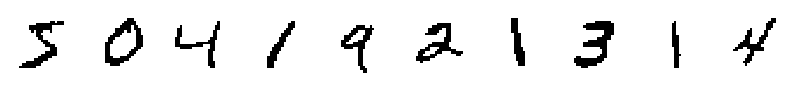

In [21]:
_,axes = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axes[i].imshow(trainData[i].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
    axes[i].axis('off')
plt.show()

In [10]:
testData=[]
testLabel=[]

testLen=ds.shape['test'][0]

for i in range(testLen):
    image=ds['test'][i]['image']
    image=pil_to_0_1_array(image)
    testData.append(image)
    testLabel.append(ds['test'][i]['label'])

print(len(testData))

10000


In [11]:
clf=svm.SVC(gamma=0.001)

In [12]:
clf.fit(trainData,trainLabel)

SVC(gamma=0.001)

In [13]:
print(clf.score(testData,testLabel))

0.9356


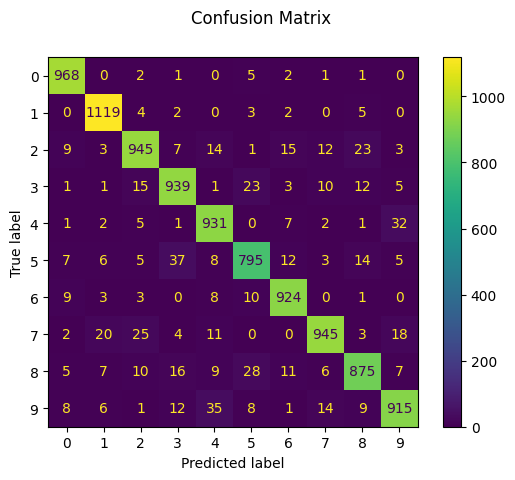

In [14]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(testLabel, clf.predict(testData))
disp.figure_.suptitle("Confusion Matrix")
# print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [15]:
with open("digit_classifier.pkl","wb") as f:
    pickle.dump(clf,f)

In [16]:
with open("./model/digit_classifier.pkl","rb") as f:
    clf2=pickle.load(f)

In [18]:
# clf2.predict(testData[0:1])
# print(clf2.predict(testData[5]))
print(testLabel[5])
print(clf2.predict(testData[5:6]))


1
[1]
